# Inverting for horizontal velocities and densities using PINNs

This notebook will invert for u, along with $\rho_s$ and L (which go into a parameterized density function), by using mass conservation and observed w. These inverted results will then be fed into a second PINN that uses the momentum equations to invert for viscosity.

## Loading and normalizing data (done locally)

In [3]:
import pandas as pd
from scipy.io import loadmat 
from scipy.io import matlab as mlb
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
import numpy as np

In [8]:
def mat_struct_to_dict(mat_struct):
    result = {}
    for fieldname in mat_struct._fieldnames:
        value = getattr(mat_struct, fieldname)
        if isinstance(value, mlb.mio5_params.mat_struct):
            result[fieldname] = mat_struct_to_dict(value)
        else:
            result[fieldname] = value
    return result

def load_mat_file(filepath):
    mat_data = loadmat(filepath, struct_as_record=False, squeeze_me=True)
    data_dict = {}
    for key, value in mat_data.items():
        if isinstance(value, mlb.mio5_params.mat_struct):
            data_dict[key] = mat_struct_to_dict(value)
        else:
            data_dict[key] = value
    return data_dict


def load_ResultsStruct(site,bad_stakes=[]):
    mat = load_mat_file(f'../../../Process_Ronne_pRES/{site}_ResultsStruct.mat')
    x = []
    z = []
    w = []
    e = []
    for i in range(len(mat['ResultsStruct'])):
        try:
            profile = mat['ResultsStruct'][i].StakedProfile.Profile
            z.append(np.array(-(profile[:,0]-mat['ResultsStruct'][i].Location.H)))
            w.append(np.array(profile[:,1]))
            e.append(np.array(profile[:,2]))
            x.append(mat['ResultsStruct'][i].Location.DistanceFromCenter*np.ones(profile[:,0].shape))
        except:
            print(f'Stake {i+1} has no data')
    x = np.array(x,dtype=object)
    z = np.array(z,dtype=object)
    w = np.array(w,dtype=object)
    e = np.array(e,dtype=object)
    
    # plot
    x_flat = np.concatenate(x)
    z_flat = np.concatenate(z)
    w_flat = np.concatenate(w)

    # define a regular grid
    grid_x, grid_z = np.meshgrid(np.linspace(min(x_flat), max(x_flat), 35), np.linspace(min(z_flat), max(z_flat), 60))

    # interpolate the data
    grid_w = griddata((x_flat, z_flat), w_flat, (grid_x, grid_z), method='linear')

    # plot the data
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(grid_x, grid_z, grid_w, shading='auto', cmap='rainbow_r',vmin = 0)
    plt.colorbar()
    
    return x,z,w,e


Stake 7 has no data


Text(0, 0.5, 'Elevation [m]')

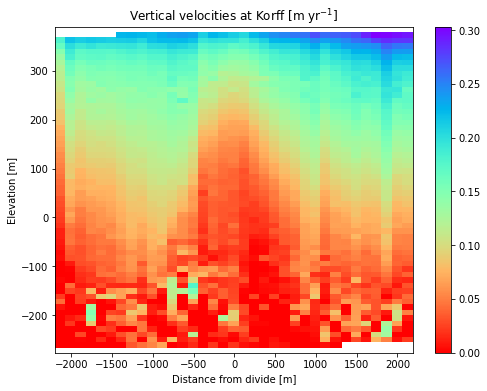

In [9]:
x,z,w,e = load_ResultsStruct('KF')
plt.title('Vertical velocities at Korff [m yr$^{-1}$]')
plt.xlabel('Distance from divide [m]')
plt.ylabel('Elevation [m]')


In [10]:
x

array([array([-2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,
       -2132.07934259, -2132.07934259, -2132.07934259, -2132.07934259,